In [1]:
# define relevants paths and load functions and libraries

%run Bianchini2025_SC\\Analysis\\helper_functions\\functions_analysis.py
    
data_path = 'Bianchini2025_SC\\Datasets\\' # your data path
saving_path = 'Bianchini2025_SC\\Figures_output\\' # your saving figures path

85.7165824074915 4.336772001486076
4.39514097014097 2.063892244606464
42.784146156873426 9.549820335249748
2.578038880311608 1.1065552559306397
37.82888046297138 12.090205229917943
10.7636383818202 6.471627483260534


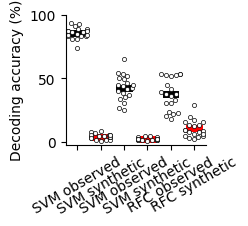

In [3]:
#  plot observed accuracy vs synthetic accuracy with only delay neurons, SVM and RFC - Fig 5B

n_neurons = 200

# load delay N data
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_delay.npy'])
accuracy_SVM_delay = np.load(load_dir) 
accuracy_SVM_delay = accuracy_SVM_delay[:,n_neurons]

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_delay_linear.npy'])
accuracy_SVM_linear_delay = np.load(load_dir) 
accuracy_SVM_linear_delay = accuracy_SVM_linear_delay[:,n_neurons]

# load SVM data
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_all_neurons_SVM.npy'])
accuracy_SVM = np.load(load_dir) 
accuracy_SVM = accuracy_SVM[:,n_neurons]

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_SVM_linear.npy'])
accuracy_SVM_linear = np.load(load_dir) 
accuracy_SVM_linear = accuracy_SVM_linear[:,n_neurons]

# load RFC data
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_RFC.npy'])
accuracy_RFC= np.load(load_dir) 
accuracy_RFC = accuracy_RFC[:,n_neurons]

load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_RFC_linear.npy'])
accuracy_RFC_linear= np.load(load_dir) 
accuracy_RFC_linear = accuracy_RFC_linear[:,n_neurons]

fig, ax = plt.subplots(1,1, figsize=(1.4,1.3)) # this is half of an A4 page
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.subplots_adjust(hspace=0.5)

for n in range(6):
    if n == 0:
        scores = accuracy_SVM_delay
        this_color = 'black'
    elif n == 1:
        scores = accuracy_SVM_linear_delay
        this_color = 'red'
    elif n == 2:
        scores = accuracy_SVM
        this_color = 'black'
    elif n == 3:
        scores = accuracy_SVM_linear
        this_color = 'red'
    elif n == 4:
        scores = accuracy_RFC
        this_color = 'black'
    elif n ==5:
        scores = accuracy_RFC_linear
        this_color = 'red'
        
    # plot scores      
    meanLineWidth = 0.2
    med = np.mean(scores)
    print(med,np.std(scores))
    ax.plot([- meanLineWidth+n, meanLineWidth+n], [med,med],linewidth = 5,c = this_color,zorder =1) 
    sns.swarmplot(x=n, y=scores, ax=ax, size=3, facecolors = 'white',edgecolor='k', linewidth=0.5, zorder=2)

ax.set_ylabel('Decoding accuracy (%)',fontsize = 10)
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylim([-2,100])
ax.set_yticks([0,50,100])
ax.set_xticklabels(['SVM observed','SVM synthetic','SVM observed','SVM synthetic','RFC observed','RFC synthetic'],rotation=30,fontsize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)        

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure5A.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)


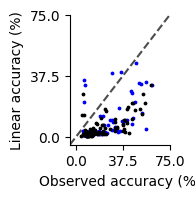

In [4]:
#  plot observed accuracy vs synthetic accuracy with SVM and RFC - Fig 5B
# load SVM data
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM.npy'])
accuracy_SVM= np.load(load_dir) 
accuracy_SVM = np.mean(accuracy_SVM,axis=1)
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_SVM_linear.npy'])
accuracy_SVM_linear = np.load(load_dir) 
accuracy_SVM_linear = np.mean(accuracy_SVM_linear,axis=1)

# load RFC data
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_RFC.npy'])
accuracy_RFC= np.load(load_dir) 
accuracy_RFC = np.mean(accuracy_RFC,axis=1)
load_dir = ''.join([data_path,'decoder_datasets\\decoder_accuracy_single_rec_RFC_linear.npy'])
accuracy_RFC_linear= np.load(load_dir) 
accuracy_RFC_linear = np.mean(accuracy_RFC_linear,axis=1)
dims = (1, 1)
max_acc = np.round(np.nanmax(np.concatenate([accuracy_SVM,accuracy_SVM_linear])))

# plot the figure
fig, ax = plt.subplots(*dims, figsize=(1,1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.plot([-5, 75], [-5, 75], ls="--", c=".3")
ax.scatter(accuracy_RFC,accuracy_RFC_linear,s = 3,c = 'b')
ax.scatter(accuracy_SVM,accuracy_SVM_linear,s = 3,c = 'k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Observed accuracy (%)',fontsize=10)
ax.set_ylim([-5,75])
ax.set_xlim([-5,75])
ax.set_xticks([0,75/2,75])
ax.set_yticks([0,75/2,75])
ax.set_ylabel('Linear accuracy (%)')

# define a saving directory and save it 
dir = ''.join([saving_path,'Figure5B.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)

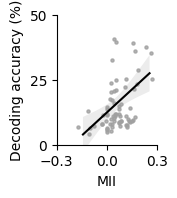

In [5]:
#  plot fit of decoding accuracy based on mean MII - Fig 5C

# load the dataframe created 
file_path = ''.join([data_path,f'decoder_datasets\\data_all_mean_25n.csv']) 
df = pd.read_csv(file_path)
# Define filenames and corresponding df attributes
files = [(''.join([data_path,'decoder_datasets\\accuracy_prediction_results_MII.mat']), 'MII')]

# Load data dynamically into lists
ypred_list, yCI_list, X_list = [], [], []

for file, _ in files:
    data = scipy.io.loadmat(file, struct_as_record=False, squeeze_me=True)
    ypred_list.append(data['ypred'])
    yCI_list.append(data['yCI'])
    X_list.append(data['n_delay'])

# Create figure and axes
fig, axs = plt.subplots(1, 1, figsize=(1, 1.3))
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.25)

# Common variable
var2 = df.accuracy  

# Iterate through datasets and subplots dynamically
for i, (_, df_attr) in enumerate(files):
    var1 = getattr(df, df_attr)  # Dynamically access the df attribute
    var3 = X_list[i]
    var4 = ypred_list[i]
    var5 = yCI_list[i]

    this_ax = axs

    # Scatter plot
    sns.regplot(x=var1, y=var2, scatter_kws={"color": '#A0A0A0', 's': 5}, fit_reg=False, ax=this_ax)

    # Regression line and confidence interval
    this_ax.plot(var3, var4, 'k')
    this_ax.fill_between(var3, var5[:, 0], var5[:, 1], color='#A0A0A0', alpha=0.2, edgecolor='none')

    # Formatting
    this_ax.spines.right.set_visible(False)
    this_ax.spines.top.set_visible(False)
    this_ax.set_ylim([0, 50])
    this_ax.set_yticks([0, 25, 50])
    this_ax.set_xticks([-0.3,0,0.3])
    this_ax.set_ylabel('Decoding accuracy (%)' if i == 0 else '', fontsize=10)
    
# define a saving directory and save it 
dir = ''.join([saving_path,'Figure5C.svg'])
fig.savefig(dir, dpi=300,format='svg',bbox_inches='tight', pad_inches=0)
